In [15]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("/content/drive/MyDrive/house_data.csv")
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA


In [16]:
df.isnull().sum()

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [17]:
x = df.drop("price", axis=1)
y = df["price"]
x = pd.get_dummies(x, drop_first=True)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, max_depth=8, random_state=42)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=8, n_estimators=200, random_state=42)

In [19]:
from sklearn.metrics import mean_squared_error,r2_score
y_pred = rf.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 974015292522.7516
R-squared: 0.04493916952263155


In [20]:
new_house=x.iloc[0:1]
predicted_price=rf.predict(new_house)
print("Predicted House Price:", predicted_price[0])

Predicted House Price: 280157.7148543551


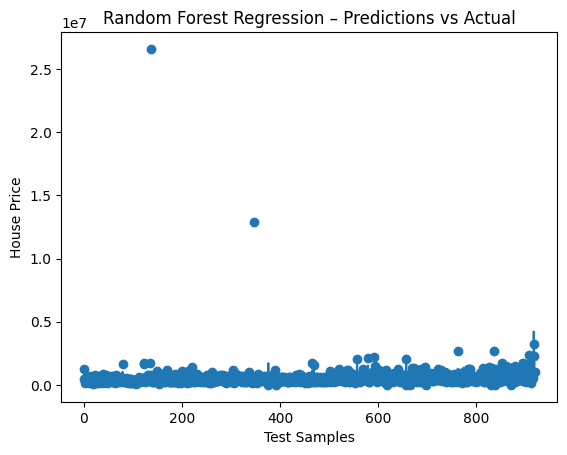

In [21]:
sorted_idx = x_test.iloc[:, 0].argsort()
X_test_sorted = x_test.iloc[sorted_idx]
y_test_sorted = y_test.iloc[sorted_idx]
rf_pred_sorted = rf.predict(X_test_sorted)
plt.figure()
plt.scatter(range(len(y_test_sorted)), y_test_sorted)
plt.plot(range(len(y_test_sorted)), rf_pred_sorted)
plt.xlabel("Test Samples")
plt.ylabel("House Price")
plt.title("Random Forest Regression – Predictions vs Actual")
plt.show()